<a href="https://colab.research.google.com/github/deepshika-babu/Mental-Fitness-Trackers-using-AI/blob/main/Mental_Health_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Mental Fitness Tracker


*   This notebook deals with the 'Mental Fitness' using diferent Machine Learning Algorithms.





### About the data:


*  Data Overview: This is a 'Mental Health' .csv data. The datasets have been obtained from Kaggle.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np      #linear algebra
import pandas as pd     #data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#Mount the Google Drive to Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries and Packages

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Exploratory Data Analysis

Load and Prepare Data


*   Reading Datasets from mounted Drive.



In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mental Fitness/prevalence-by-mental-and-substance-use-disorder _AI.csv")

In [6]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mental Fitness/mental-and-substance-use-as-share-of-disease -AI.csv")

In [7]:
df1.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [8]:
df2.head(10)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
5,Afghanistan,AFG,1995,1.738272
6,Afghanistan,AFG,1996,1.778098
7,Afghanistan,AFG,1997,1.781815
8,Afghanistan,AFG,1998,1.729402
9,Afghanistan,AFG,1999,1.850988


### Merging of Datasets

In [9]:
data =  pd.merge(df1,df2)
data.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


### Data Cleaning

In [10]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [11]:
data.drop('Code', axis=1,inplace=True)

In [12]:
data.head(10)

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [13]:
data.size,data.shape

(68400, (6840, 10))

In [14]:
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','Drug_Usage','Depression','Alcohol','Mental_Fitness_Rate'], axis='columns', inplace=True)

In [15]:
data.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_Usage,Depression,Alcohol,Mental_Fitness_Rate
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


# Data Visualization

Heat Map

[]

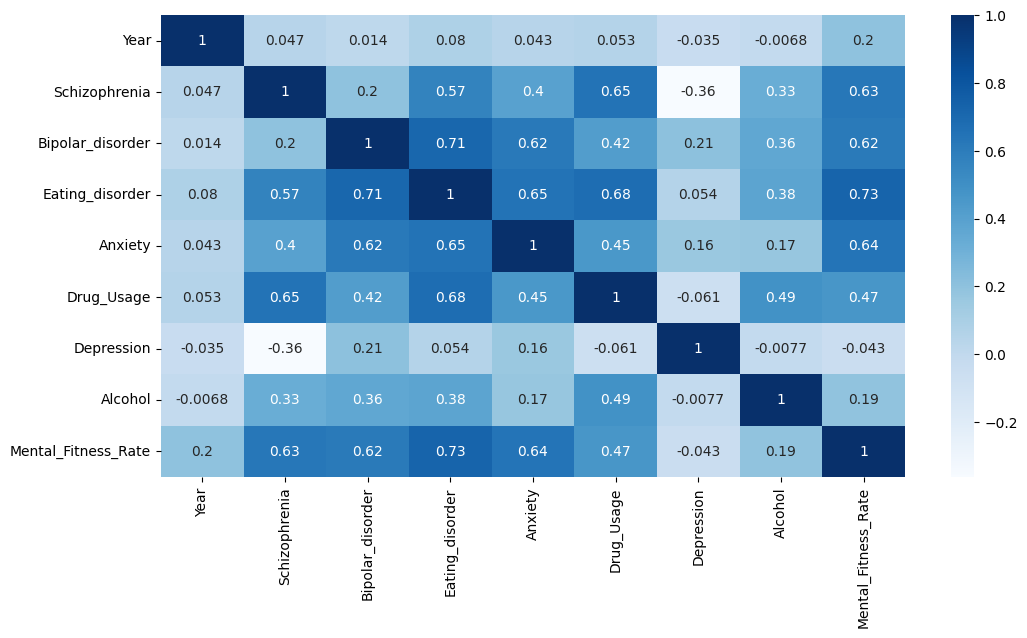

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

Pair Plot Map

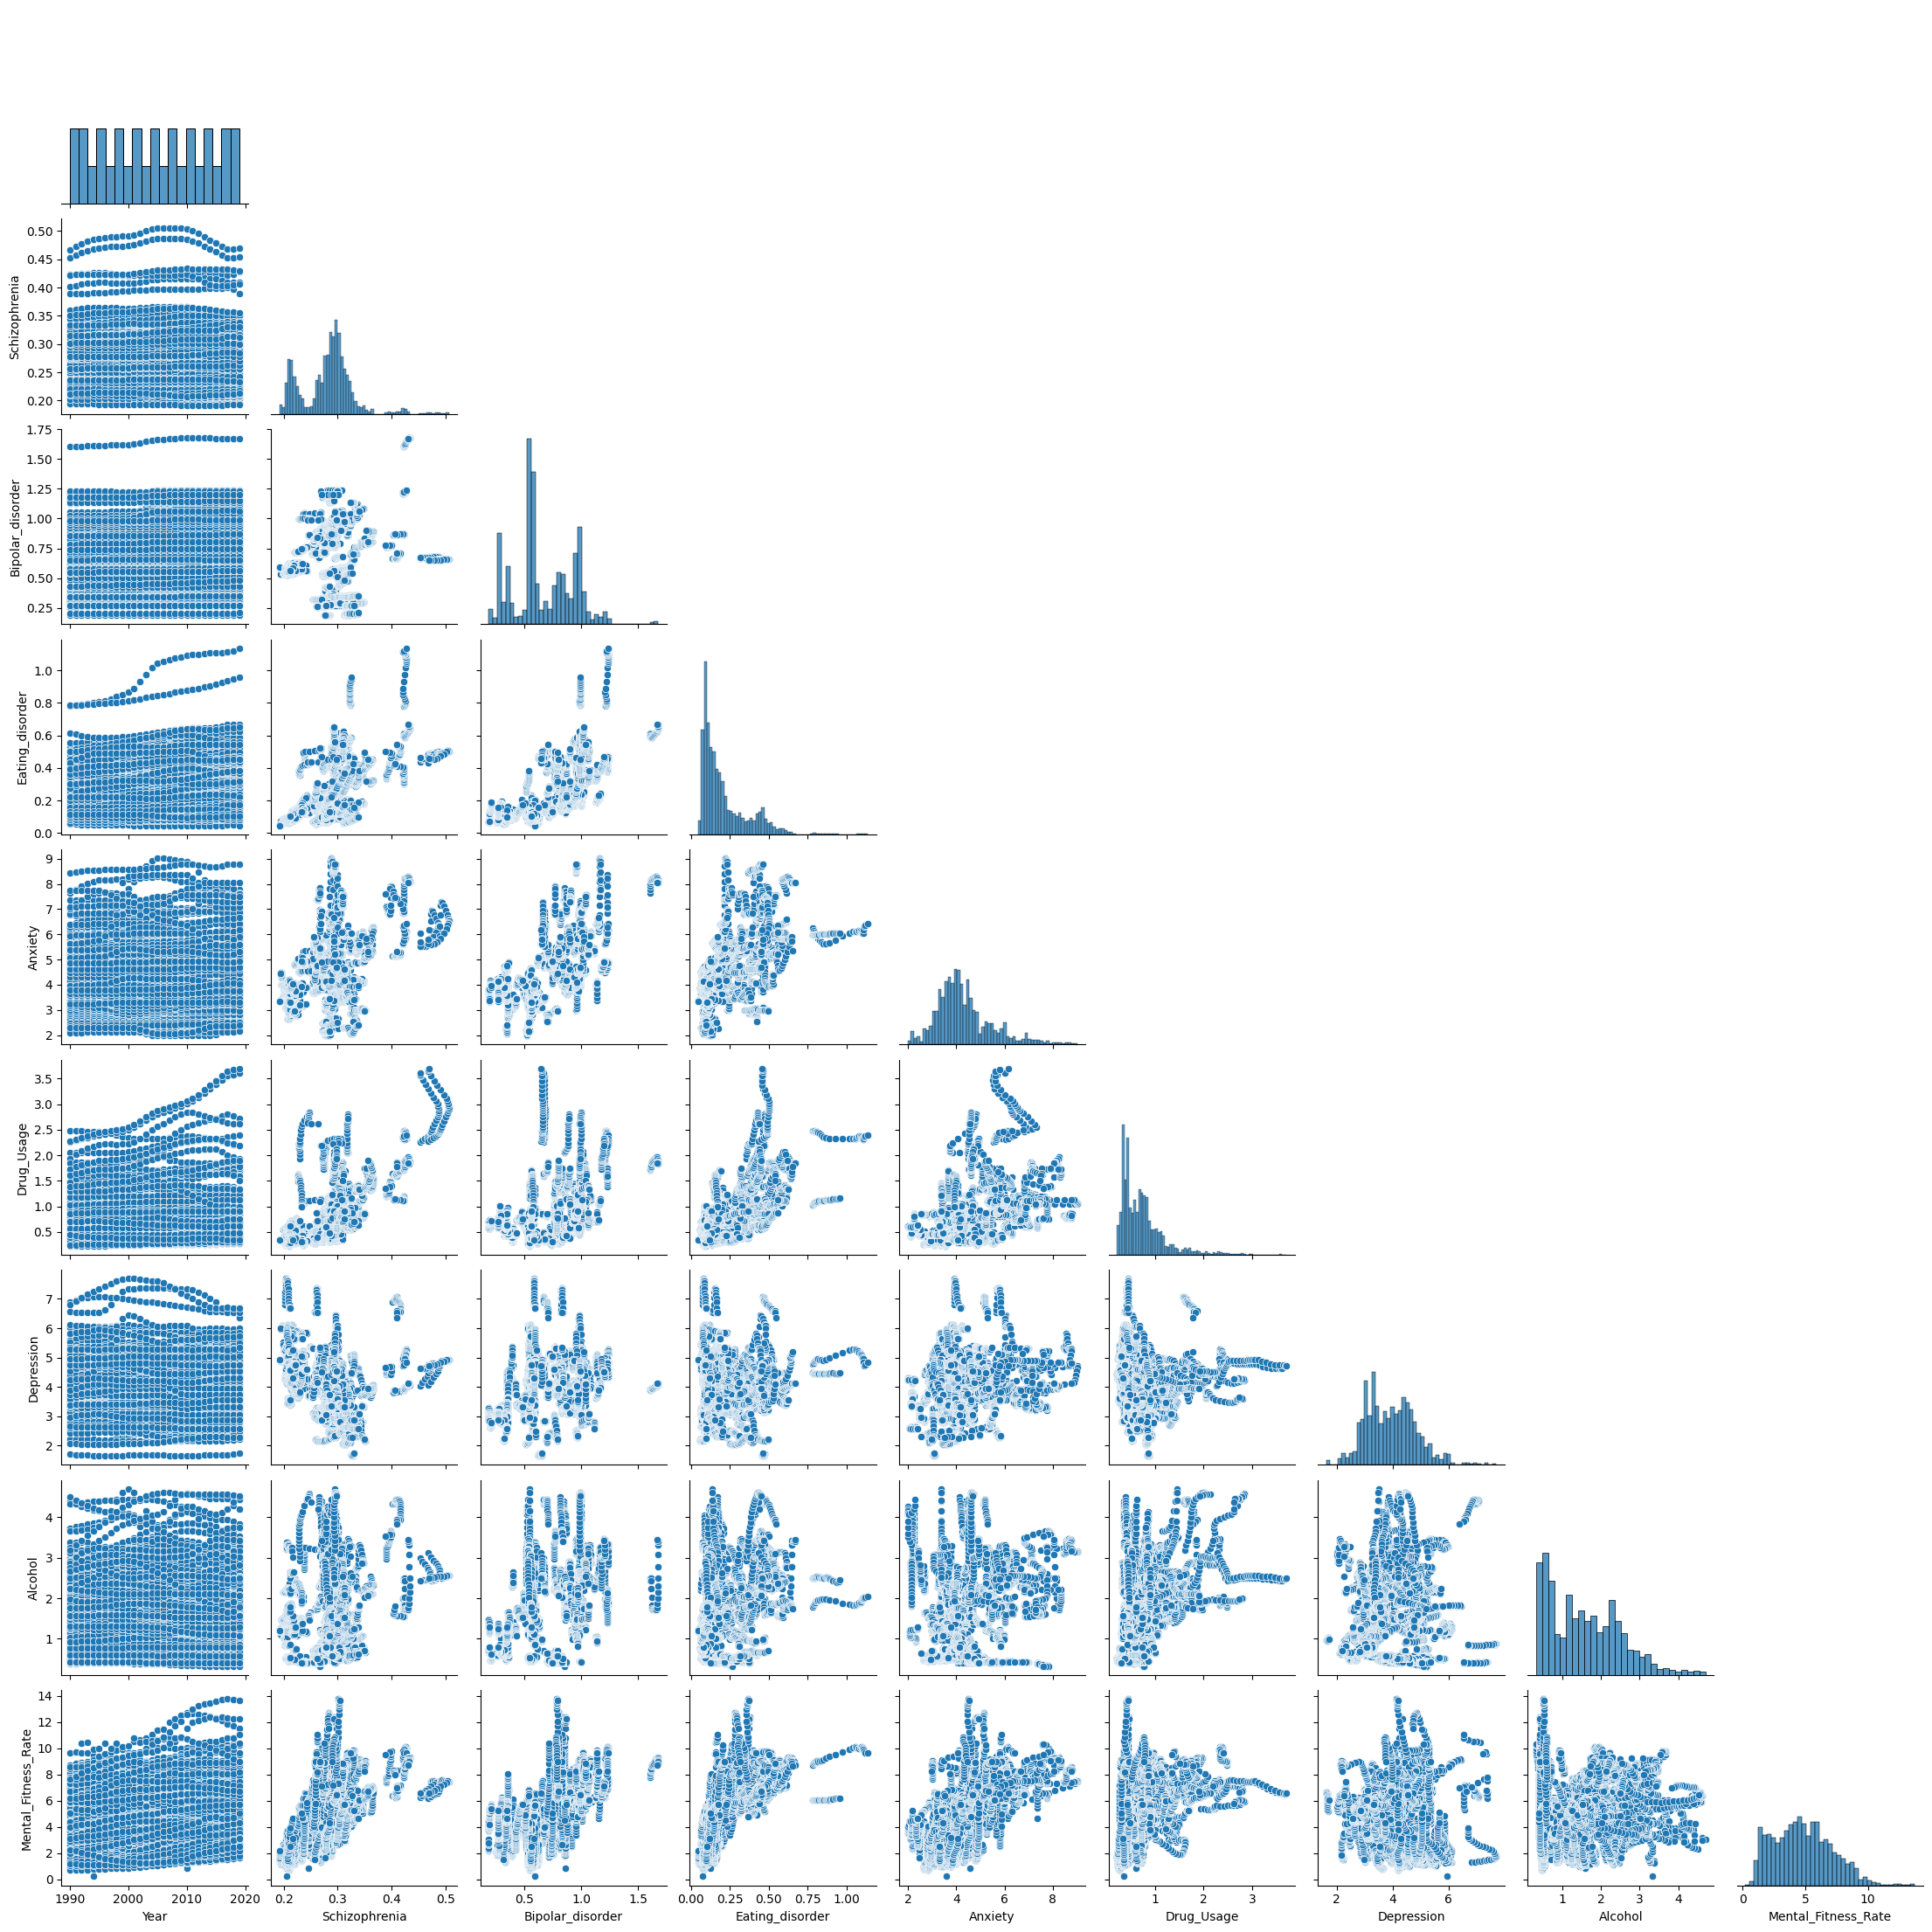

In [17]:
sns.pairplot(data,corner=True)
plt.show()

In [18]:
mean = data['Mental_Fitness_Rate'].mean()
mean

4.8180618117506135

Pie Chart

In [19]:
fig = px.pie(data, values='Mental_Fitness_Rate', names='Year')
fig.show()

Bar Graph

In [20]:
fig=px.bar(data.head(10),x='Year',y='Mental_Fitness_Rate',color='Year',template='ggplot2')
fig.show()

In [21]:
fig = px.line(data, x="Year", y="Mental_Fitness_Rate", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [22]:
df = data.copy()

In [23]:
df.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_Usage,Depression,Alcohol,Mental_Fitness_Rate
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              6840 non-null   object 
 1   Year                 6840 non-null   int64  
 2   Schizophrenia        6840 non-null   float64
 3   Bipolar_disorder     6840 non-null   float64
 4   Eating_disorder      6840 non-null   float64
 5   Anxiety              6840 non-null   float64
 6   Drug_Usage           6840 non-null   float64
 7   Depression           6840 non-null   float64
 8   Alcohol              6840 non-null   float64
 9   Mental_Fitness_Rate  6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


## Data PreProcessing

In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [25]:
df.shape

(6840, 10)

## ML Implementation

In [27]:
X = df.drop('Mental_Fitness_Rate',axis=1)
y = df['Mental_Fitness_Rate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
print("xtrain: ",X_train.shape)
print("xtest: ",X_test.shape)
print("ytrain: ", y_train.shape)
print("ytest:", y_test.shape)

xtrain:  (5472, 9)
xtest:  (1368, 9)
ytrain:  (5472,)
ytest: (1368,)


## Applying Different Regression Algorithms

In [29]:
# Create a dictionary to store the model performance
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()


Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.1393226139229882
   R-squared Score: 0.7631556697280758

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 2.7702717436599804
   R-squared Score: 0.4241111799412294

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 2.740266404991704
   R-squared Score: 0.4303487409749741

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525787108
   R-squared Score: 0.8884509351204317

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.0810217888155409
   R-squared Score: 0.983157052203699

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.029563445695973984
   R-squared Score: 0.9938543004318295

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 4.7911713917240055
   R-squared Score: 0.0040031105995593785

Model: 8. XGBoost Regression
   Mean Squared Error (MSE): 0.04225689361124382
   R-squared Score: 0.9912155648062968

Model: 9. K-Nearest Neighbors Regressi

## Plotting Predicted Vs Actual Values Graph

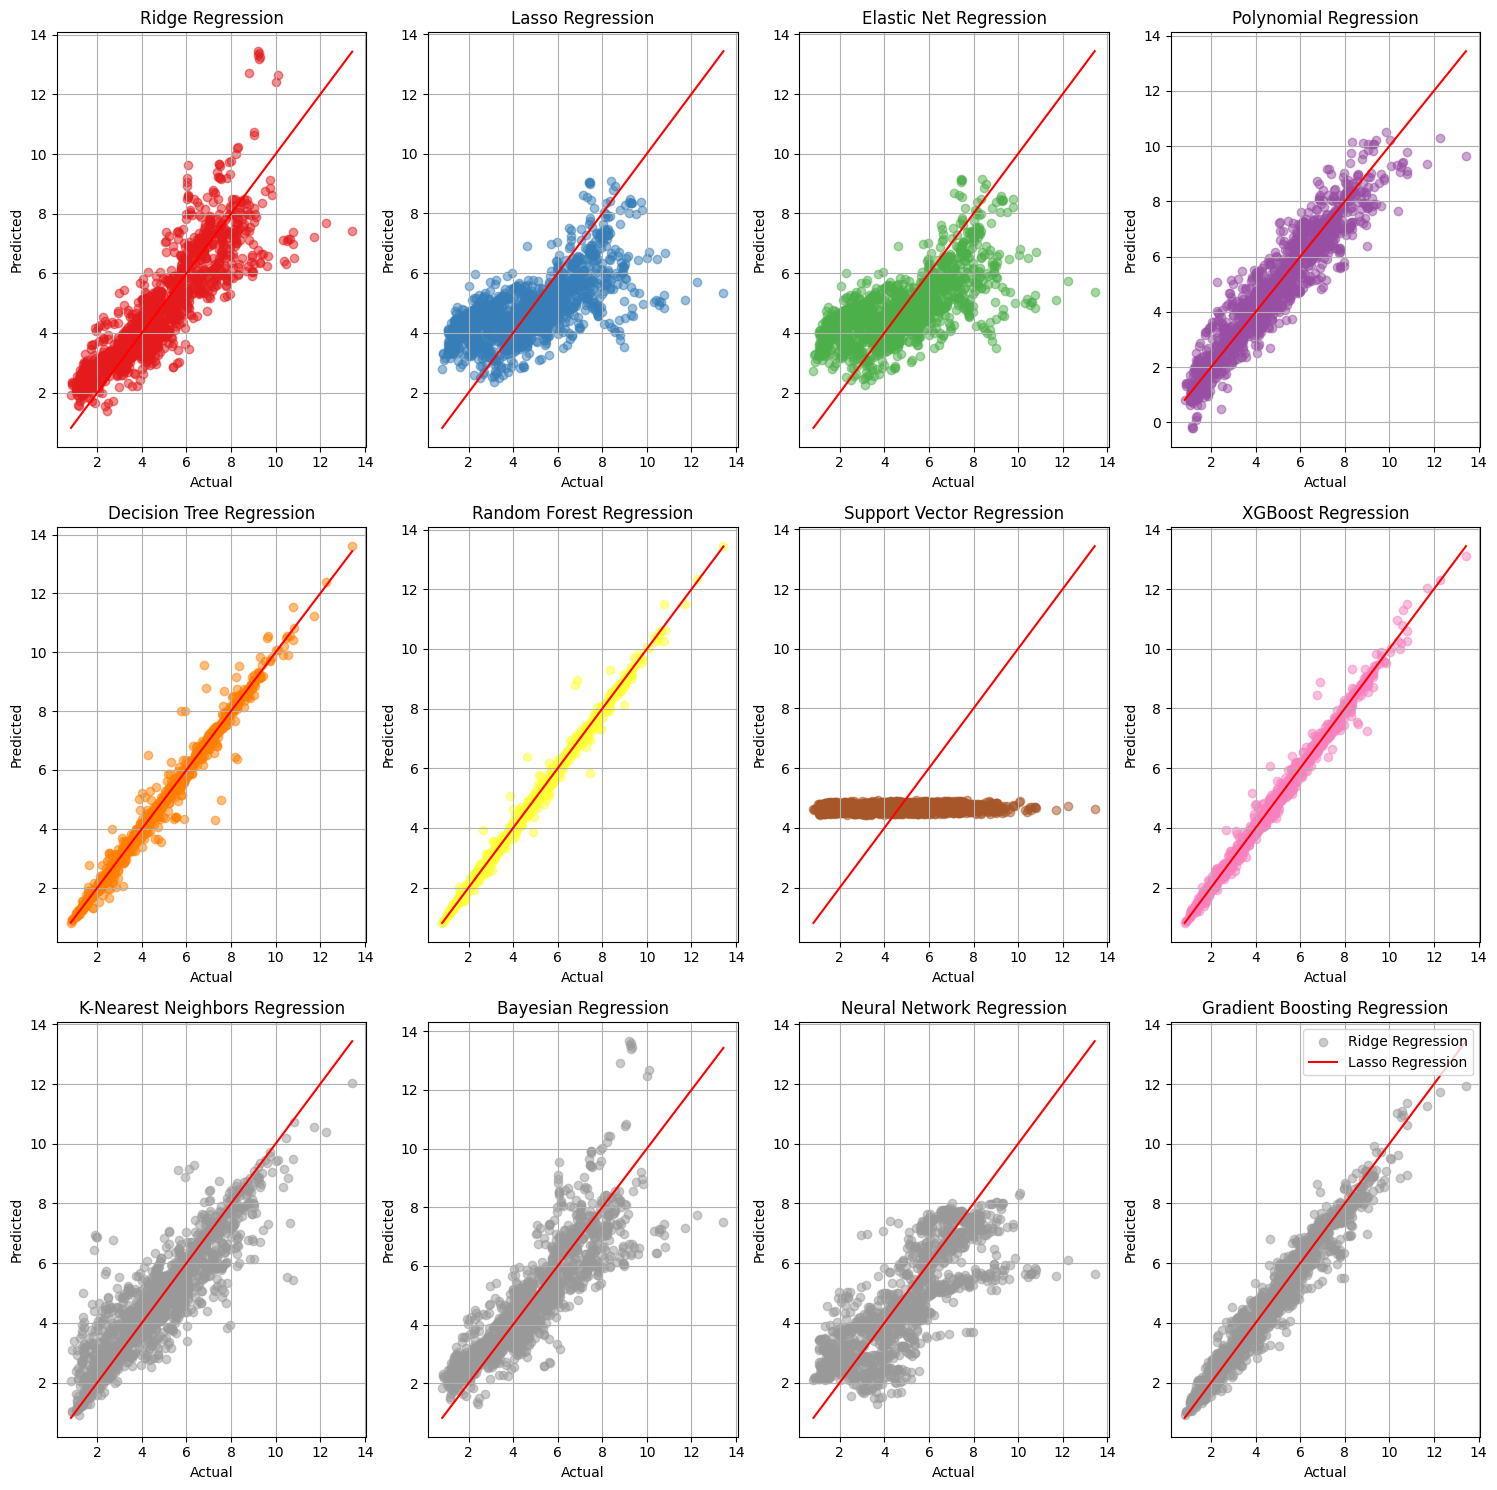

In [30]:
# Create a dictionary to store the model performance
model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 4) + (1 if num_models % 4 != 0 else 0)
fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 4
    col = i % 4
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

---
## PRINTING REGRESSION MODEL IN ORDER OF PRECISION AND A FINAL RESULT TELLING WHICH REGRESSION MODEL HAS THE MOST PRECISE VALUE AND WHICH REGRESSION MODEL HAS LEAST PRECISE VALUE


In [31]:
# Store the regression models and their scores in a dictionary
regression_scores = {
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "XGBoost Regression": (xgb_mse, xgb_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")


Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.029563445695973984
   R-squared Score: 0.9938543004318295

2. XGBoost Regression
   Mean Squared Error (MSE): 0.04225689361124382
   R-squared Score: 0.9912155648062968

3. Decision Tree Regression
   Mean Squared Error (MSE): 0.0810217888155409
   R-squared Score: 0.983157052203699

4. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.24567265461520307
   R-squared Score: 0.9489291490949054

5. Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525787108
   R-squared Score: 0.8884509351204317

6. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 1.0049803438106724
   R-squared Score: 0.7910829702162167

7. Bayesian Regression
   Mean Squared Error (MSE): 1.135667232782995
   R-squared Score: 0.7639155566006879

8. Ridge Regression
   Mean Squared Error (MSE): 1.1393226139229882
   R-squared Score: 0.7631556697280758

9. Neural Network Regression
   Mean Squa

## CONCLUSION: Random Forest Regression works well on both train and test sets with r2 score of 0.99. Hence it is the most precise model. Decision Tree Regression also works well on both train and test set with r2 score of 0.98.

## TESTING

In [33]:
print("Welcome to Mental Fitness Tracker!\nFill the detail to check your mental fitness!")
country= l.fit_transform([input('Enter Your country Name:')])
year= int(input("Enter the Year:"))
schi= (float(input("Enter your Schizophrenia rate in %:")))
bipo_dis= (float(input("Enter your Bipolar disorder rate in %:")))
eat_dis= (float(input("Enter your Eating disorder rate in %:")))
anx= (float(input("Enter your Anxiety rate in %:")))
drug_use= (float(input("Enter your Drug Usage rate in per year %:")))
depr= (float(input("Enter your Depression rate in %:")))
alch= (float(input("Enter your Alcohol Consuming rate per year in %:")))


prediction= forest_model.predict([[country,year,schi,bipo_dis,eat_dis,anx,drug_use,depr,alch]])
print("\nYour Mental Fitness Rate is {}%".format(prediction))
print("\nTHANK YOU!!!")

Welcome to Mental Fitness Tracker!
Fill the detail to check your mental fitness!
Enter Your country Name:India
Enter the Year:2020
Enter your Schizophrenia rate in %:2.464756474
Enter your Bipolar disorder rate in %:0.243547548
Enter your Eating disorder rate in %:1.908868852
Enter your Anxiety rate in %:1.735809004
Enter your Drug Usage rate in per year %:0.543725332
Enter your Depression rate in %:1.2093645572
Enter your Alcohol Consuming rate per year in %:0.1234563446

Your Mental Fitness Rate is [10.04974612]%

THANK YOU!!!
